In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(20.0, 10.0)

In [2]:
#Reading Data
data=pd.read_csv("headbrain.csv")
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
#Collecting X & Y values
X=data['Head Size(cm^3)'].values
Y=data['Brain Weight(grams)'].values

In [4]:
#Mean X and Y

mean_X=np.mean(X)
mean_Y=np.mean(Y)

#Total Numbers of values
m= len(X)

#Using Formular to calculate b1 and b2
numer=0
denom=0

for i in range(m):
    numer+=(X[i]-mean_X)*(Y[i]-mean_Y)
    denom+=(X[i]-mean_X)**2

b1=numer/denom
b0=mean_Y-(b1*mean_X)

#Print Coefficients
print(b1, b0)



0.26342933948939945 325.57342104944223


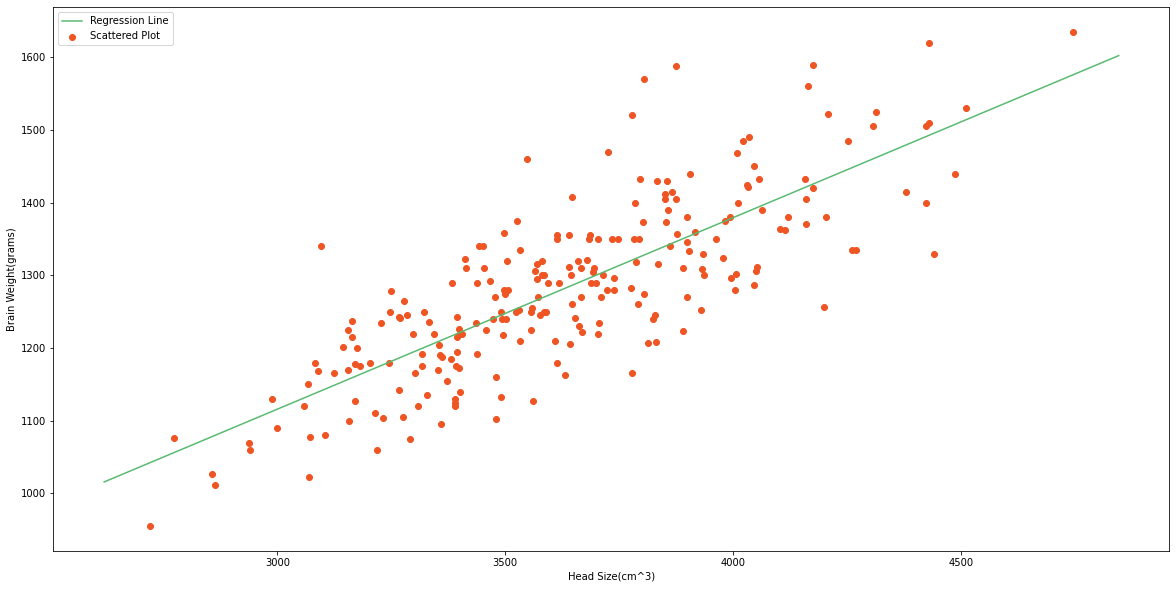

In [5]:
#Plotting values and Regression line

max_x=np.max(X)+100
min_x=np.min(X)-100

#Calculating Line Values x and y
x=np.linspace(min_x,max_x,1000)
y=b0 + b1 * x

#Plotting Line
plt.plot(x, y, color='#58b970', label='Regression Line')

#Plotting scattered points
plt.scatter(X, Y, c='#ef5423', label='Scattered Plot')

plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.legend()
plt.show()



In [6]:
#LETS CHECK HOW GOOD OUR MODEL IS 

ss_t=0 #total sum of squares 
ss_r=0 #total sum of squares of residuals and R square

for i in range(m):
    y_pred=b0 + b1 * X[i]
    ss_t+=(Y[i]-mean_Y)**2
    ss_r+=(Y[i]-y_pred)**2

r2=1 - (ss_r/ss_t)
print(r2)

0.6393117199570003


In [7]:
#USING MACHINE LEARNING LIBRARY CALL SCIKIT-LEARN

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Cannot use  Rank 1  matrix in scikit  learn
X=X.reshape((m,1))
#Y=Y.reshape((m,1))

#Creating Model
reg=LinearRegression()

#Fitting Training Data
reg=reg.fit(X,Y)

#Y Prediction
Y_pred=reg.predict(X)

#Calculating R2 Square

r2_score=reg.score(X,Y)
print(r2_score)

0.639311719957
